# re:ad Quantitative Analysis

*This dataset captures user interactions within our system, categorizing every highlight made during the evaluation. Each row represents a single highlight from a user, with metadata describing its purpose, cognitive goal, and connections to other highlights.*

### Schema Description

- user: The user who made the highlight.
- highlight: The text snippet selected by the user.
- cognitiveGoal: During our evaluation, we asked users to make a first pass and then another pass to discern the paper's methodology. These are the two cognitive goals present in the dataset.
- cognitiveGoalIndex: A numerical index that maps the highlight temporally within a single cognitive goal.
- unit: The length of the higlight.
- type: The category of the highlight, aligned with one of five predefined themes: Challenges, Study, Design, Tools, or Impact.
- connections: Links between highlights that share contextual or conceptual relationships.

In [ ]:
import pandas as pd
from google.colab import files
import IPython.display as display

# Upload file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the CSV into a DataFrame
df = pd.read_csv(filename)

# Display the DataFrame with scrollable output
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display.display(df)

Saving re-ad-dataset.csv to re-ad-dataset (1).csv


,user,highlight,cognitiveGoal,cognitiveGoalIndex,unit,type,connections
0,Tianyou Wang,gaps,FIRST,0,TERM,Challenges,NaN
1,Tianyou Wang,explantory study of analysts using a domain-sp...,FIRST,1,PASSAGE,Study,NaN
2,Tianyou Wang,reflect on their implicit understanding of the...,METHOD,0,PASSAGE,Study,NaN
3,Tianyou Wang,analysts' domain knowledge,METHOD,1,TERM,Study,NaN
4,Tianyou Wang,conceptual models,METHOD,2,TERM,Design,NaN
5,Tianyou Wang,software tools exist for building conceptual m...,METHOD,3,PHRASE,Tools,NaN
6,Tianyou Wang,external (goal(i),METHOD,4,TERM,Challenges,M6
7,Tianyou Wang,which implicit assumptions are important,METHOD,5,PHRASE,Challenges,NaN
8,Tianyou Wang,express,METHOD,6,TERM,Design,M4
9,Tianyou Wang,for- mulate,METHOD,7,TERM,Design,NaN


### Highlight by type

- Challenges: This category covers usability challenges in tool design, such as making the specification process easier and guiding users on important implicit assumptions.
- Study: This category includes findings from exploratory studies.
- Design: This category covers principles, methodologies, and frameworks for structuring conceptual models and translating them into statistical models, as covered by the paper.
- Tools: This category refers to discussion about software, languages, and frameworks that the paper discusses to support conceptual modeling, statistical modeling, and data analysis.
- Impact: This category inlcudes content on the effects of rTisane on analysts’ ability to create accurate conceptual and statistical models.

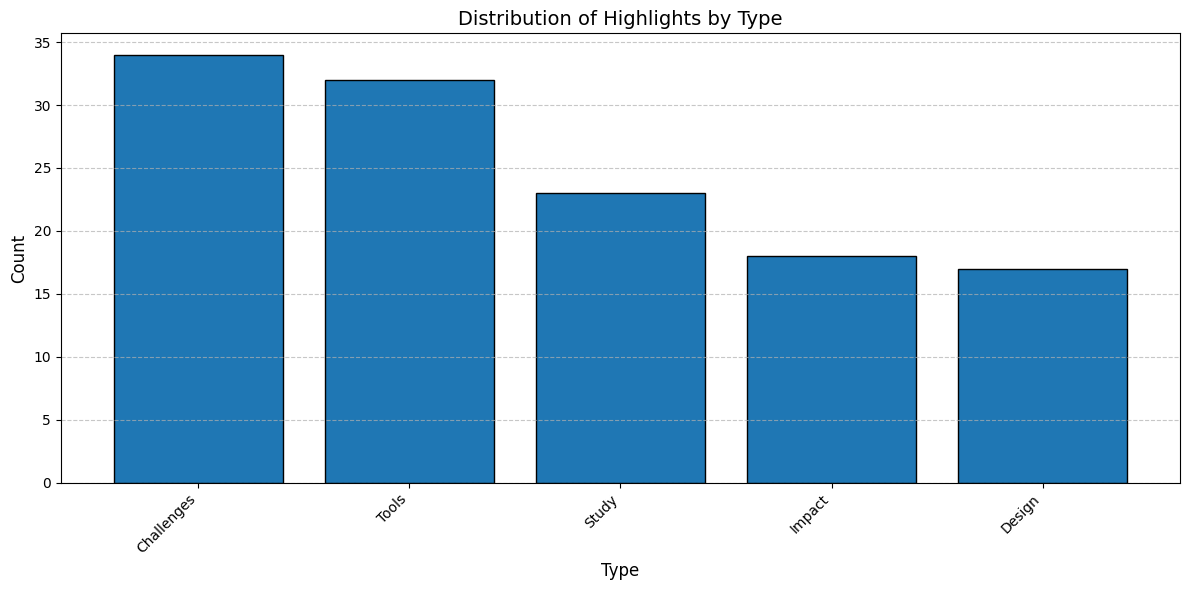

In [ ]:
plt.figure(figsize=(12, 6))
df['type'].value_counts().plot(kind='bar', color='tab:blue', edgecolor='black', width=0.8)

# Customize the plot
plt.title("Distribution of Highlights by Type", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

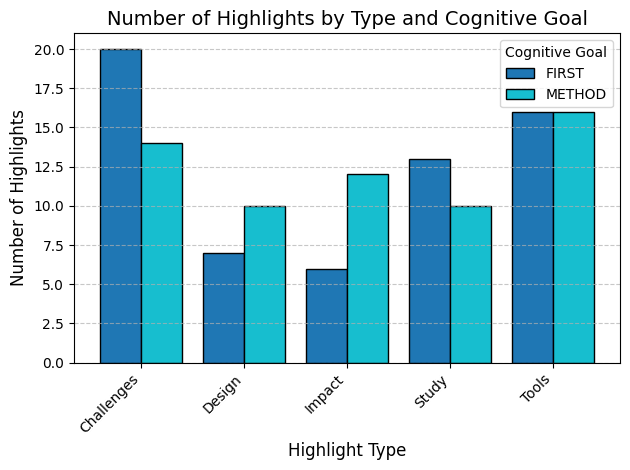

In [ ]:
highlight_counts = df.groupby(['type', 'cognitiveGoal']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
highlight_counts.plot(kind='bar', stacked=False, colormap='tab10', width=0.8, edgecolor='black')

# Customize the plot
plt.title("Number of Highlights by Type and Cognitive Goal", fontsize=14)
plt.xlabel("Highlight Type", fontsize=12)
plt.ylabel("Number of Highlights", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Cognitive Goal", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

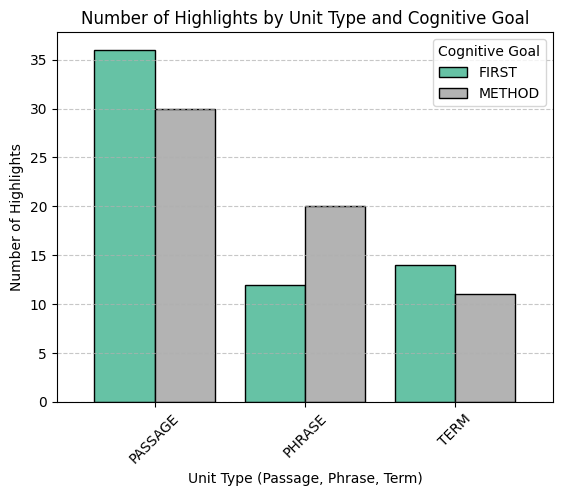

In [ ]:
unit_cognitive_goal_counts = df.groupby(['unit', 'cognitiveGoal']).size().unstack(fill_value=0)

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
unit_cognitive_goal_counts.plot(kind='bar', stacked=False, colormap='Set2', width=0.8, edgecolor='black')

# Customize the plot
plt.title("Number of Highlights by Unit Type and Cognitive Goal")
plt.xlabel("Unit Type (Passage, Phrase, Term)")
plt.ylabel("Number of Highlights")
plt.xticks(rotation=45)
plt.legend(title="Cognitive Goal")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

The resulting graphs provide some insights into how highlights are distributed across different types and units and how this distribution shifts between the FIRST and METHOD cognitive goals.

- Some highlight types have a relatively balanced distribution between the FIRST and METHOD cognitive goals, while others show a strong preference for one over the other.
- We see that challenges had a significant decrease in highlights during the METHOD pass, indicating users intially focus on challenges, but then less so during later reads.
- We also see that design and impact highlights were focused on more heavily during the METHOD cognitive goal
- **In the second chart, even though participants only read the introduction twice, each time with a different cognitive goal, the number of highlights doesn’t decrease significantly, which implies the dense of information in the paper and how different cognitive goals lead to reader’s attention on different piece of information.**
- Finally, longer passages are the most common highlight unit among both FIRST and METHOD cognitive goals

Implications

Since this is a small sample size, it is difficult to derive any actionable insights from our current data. However, this evaluation has revealed that if we were to collect more data about higlight type/unit distribution over multiple cogntiive goals, we may be able to make our tool more opinionated.

Given trends about what higlight types are common with specific cognitive goals, we may be able to alter the node editor interface to provide specific tool support based on the current cognitive goal.

Another example is as follows: When users highlight entire paragraphs, they are likely focusing on big-picture comprehension or structural organization within a document. Given the frequency/length of the highlight, we could choose whether or not to include a summary panel as opposed to a definition panel (for a single term) based on the frequency with which people highlight long passages versus single words.